# Chapter 1 - plots and graphs

Import necessary libraries

In [3]:
using Plots

Local minimum of constrained optimization problem 

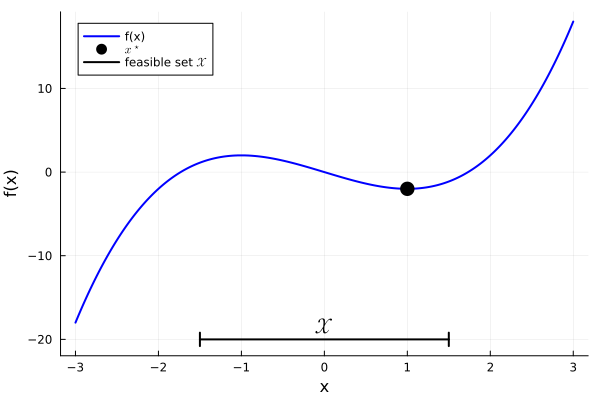

In [4]:
using Plots

# Define a function with local max and min
f(x) = x^3 - 3x

# Range for plotting
xs = range(-3, 3, length=400)

# Local minimum at x* = sqrt(1) = 1
x_star = 1.0
y_star = f(x_star)

# Plot
plot(xs, f.(xs), linewidth=2, label="f(x)", color=:blue)
scatter!([x_star], [y_star], color=:black, label="\$x^\\star\$", markersize=8)

# Feasible set line with vertical end lines and label above
y_feas = minimum(f.(xs)) - 2
x_start, x_end = -1.5, 1.5

# Draw the horizontal feasible set line
plot!([x_start, x_end], [y_feas, y_feas], color=:black, lw=2, label="feasible set \$\\mathcal{X}\$")

# Draw vertical lines at both ends
plot!([x_start, x_start], [y_feas-0.8, y_feas+0.8], color=:black, lw=2, label="")
plot!([x_end, x_end], [y_feas-0.8, y_feas+0.8], color=:black, lw=2, label="")

# Annotate above the line
annotate!((0, y_feas + 1.6, text("\$\\mathcal{X}\$", 14, :center)))

xlabel!("x")
ylabel!("f(x)")


Save the image to the current directory

In [5]:
# Save the plot as vector graphic in pdf format
savefig("local_min_feasible_set.pdf")

"c:\\Users\\tomas\\Desktop\\Tom\\MUNI\\Mgr studium\\Diplomka\\code\\local_min_feasible_set.pdf"

#### First and second order necessary conditions for local minimum
The following cell of code illustrates that althought both the first and second order necessary conditions for a local minimum are satisfied at the point $x^\star$ , it is not a local minimum

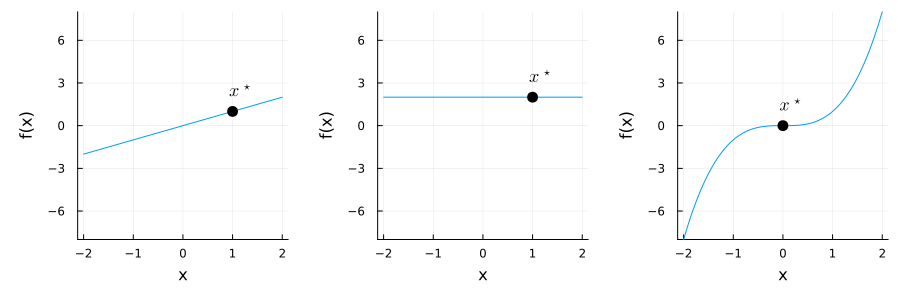

In [6]:
using Plots.PlotMeasures

# Define the functions
f1(x) = x
f2(x) = 2.0
f3(x) = x^3

xs = range(-2, 2, length=200)

# Compute y-limits across all functions
ys_all = vcat(f1.(xs), f2.(xs), f3.(xs))
ymin, ymax = extrema(ys_all)

# Choose a common x* value for f1 and f2
x_star = 1.0

# For f3, set x* at 0
x3_star = 0.0

# Compute y* for each function
y1_star = f1(x_star)
y2_star = f2(x_star)
y3_star = f3(x3_star)

# Offset for annotation (adjust as needed)
dx, dy = 0.2, 1.5

plt1 = plot(xs, f1.(xs), label="", title="", legend=:bottomright, ylim=(ymin, ymax),
            left_margin=8mm, bottom_margin=8mm)
scatter!([x_star], [y1_star], color=:black, label="", markersize=6)
annotate!((x_star + dx, y1_star + dy, text("\$x^\\star\$", 12, :black)))
xlabel!("x")
ylabel!("f(x)")

plt2 = plot(xs, f2.(xs), label="", title="", legend=:bottomright, ylim=(ymin, ymax),
            left_margin=8mm, bottom_margin=8mm)
scatter!([x_star], [y2_star], color=:black, label="", markersize=6)
annotate!((x_star + dx, y2_star + dy, text("\$x^\\star\$", 12, :black)))
xlabel!("x")
ylabel!("f(x)")

plt3 = plot(xs, f3.(xs), label="", title="", legend=:bottomright, ylim=(ymin, ymax),
            left_margin=8mm, bottom_margin=8mm)
scatter!([x3_star], [y3_star], color=:black, label="", markersize=6)
annotate!((x3_star + dx, y3_star + dy, text("\$x^\\star\$", 12, :black)))
xlabel!("x")
ylabel!("f(x)")

plot(plt1, plt2, plt3, layout=(1,3), size=(900,300))


In [7]:
# save the figure
savefig("not_minimum.pdf")

"c:\\Users\\tomas\\Desktop\\Tom\\MUNI\\Mgr studium\\Diplomka\\code\\not_minimum.pdf"

Multivariate case. This example shows three types of points where gradient is zero: local min, local max, saddle point

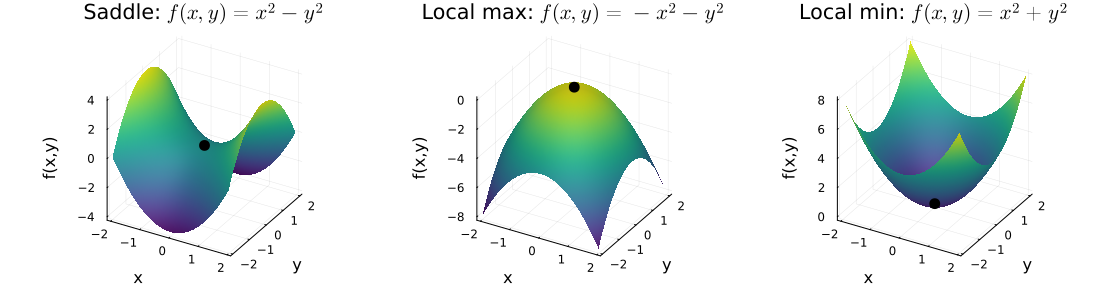

In [8]:
# Define the functions
f1(x, y) = x^2 - y^2
f2(x, y) = -x^2 - y^2
f3(x, y) = x^2 + y^2

# Define symmetric ranges for x and y
xs = ys = range(-2, 2, length=100)

# Create meshgrids
X = repeat(xs', length(ys), 1)
Y = repeat(ys, 1, length(xs))

# Compute Z values for each function
z1 = f1.(X, Y)
z2 = f2.(X, Y)
z3 = f3.(X, Y)

# Surface plots for 2D visualization with green-blue colormap
plt1 = surface(xs, ys, z1, title="Saddle: \$f(x,y)=x^2-y^2\$",
               xlabel="x", ylabel="y", zlabel="f(x,y)", legend=false, c=:viridis, grid=true)
scatter!(plt1, [0.0], [0.0], [f1(0.0, 0.0)], color=:black, markersize=6, label="Saddle point")

plt2 = surface(xs, ys, z2, title="Local max: \$f(x,y)=-x^2-y^2\$",
               xlabel="x", ylabel="y", zlabel="f(x,y)", legend=false, c=:viridis, grid=true)
scatter!(plt2, [0.0], [0.0], [f2(0.0, 0.0)], color=:black, markersize=6, label="Local max")

plt3 = surface(xs, ys, z3, title="Local min: \$f(x,y)=x^2+y^2\$",
               xlabel="x", ylabel="y", zlabel="f(x,y)", legend=false, c=:viridis, grid=true)
scatter!(plt3, [0.0], [0.0], [f3(0.0, 0.0)], color=:black, markersize=6, label="Local min")

plot(plt1, plt2, plt3, layout=(1,3), size=(1100,300))


In [9]:
# save the figure as vector graphic in pdf format
savefig("multivariate_critical_points.pdf")


"c:\\Users\\tomas\\Desktop\\Tom\\MUNI\\Mgr studium\\Diplomka\\code\\multivariate_critical_points.pdf"

Now let's illustrate the situation where both FOND and SONC are satisfied, but the point is not a local minimum. This is the case where the Hessian is positive semidefinite but not positive definite.

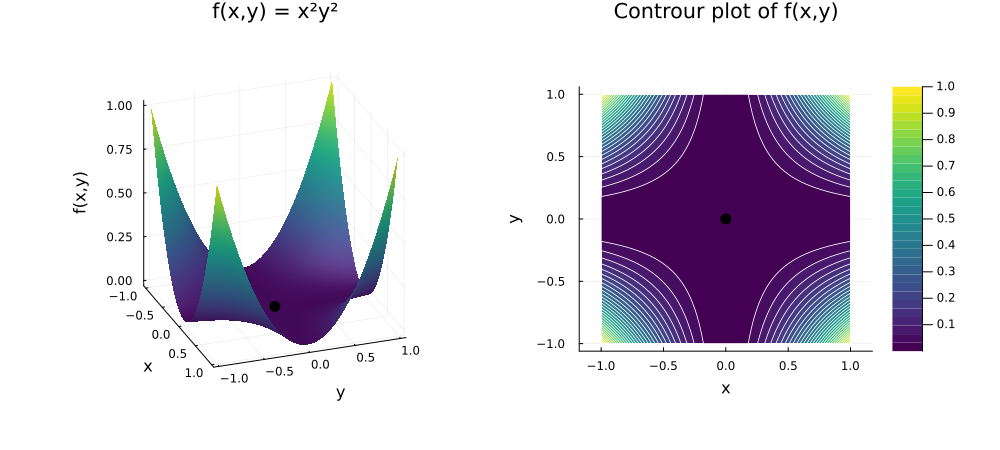

In [33]:
# Define the function
f(x, y) = x^2 * y^2

# Create a grid of points
xs = ys = range(-1, 1, length=200)
X = repeat(xs', length(ys), 1)
Y = repeat(ys, 1, length(xs))
Z = f.(X, Y)

# Surface plot
p1 = surface(xs, ys, Z,
    title="f(x,y) = x²y²",
    xlabel="x", ylabel="y", zlabel="f(x,y)",
    legend=false, c=:viridis,
    grid=true,
    camera=(70, 25))  # Adjust viewing angle with azimuth and elevation

scatter!(p1, [0.0], [0.0], [0.0], color=:black, markersize=6, label="")

# filled contour plot
p2 = contourf(xs, ys, Z;
    title="Controur plot of f(x,y)",
    xlabel="x", ylabel="y",
    levels=30,
    c=:viridis,
    linewidth=0.8,
    linecolor=:white,
    fill=true,
    colorbar=true,
    legend=false,
    aspect_ratio=:equal)

scatter!(p2, [0.0], [0.0], color=:black, markersize=6, label="")

# Combine plots
plot(p1, p2, layout=(1,2), size=(1000,450), margin=5mm)

In [35]:
# exort the figure as vector graphic in pdf format
savefig("not_local_minimum_2d.pdf")

"c:\\Users\\tomas\\Desktop\\Tom\\MUNI\\Mgr studium\\Diplomka\\code\\not_local_minimum_2d.pdf"